# Fitbit-X EDA (Part 2)

### IEOR $135$, Spring $2019$
#### Adele Bloch, Sarah Cook, Daniel Hwang, Kelley Liu, Wilson Tam

This notebook is part 2, the EDA portion of our work. 

**** A few of the pickled files (in JSON section) were unable to be uploaded onto github because of the 100MB limit, so the 2 notebooks cannot be re-run as not all of the files are uploaded. ****

## Table of Contents
#### I. Cleaning
    i. CSV Files
        a. EDA
    ii. JSON Files
    
#### II. EDA (part 2 notebook)
    i. JSON Files
        a. Activity
        b. Heartrate
        c. Calories
        d. Sleep

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import math
import calendar
import json
import os

In [95]:
temp_filenames = ['resting.pk1','sed_active.pk1','sleeping.pk1','dist.pk1','mod_active.pk1','very_act.pk1','alt.pk1','activity.pk1','light_active.pk1', 'cal_burned.pk1']

cleaned = []
for i in range(len(temp_filenames)):
    cleaned.append(pd.read_pickle('./Adele_files/cleaned/' + temp_filenames[i]))
    

## Activity

### Activity Summary

In [96]:
activity = cleaned[7]
activity.head()

,activityName,averageHeartRate,calories,distance,distanceUnit,elevationGain,logId,originalDuration,originalStartTime,pace,speed,startTime,steps,sedentary,lightly,fairly,very
activity summary,,,,,,,,,,,,,,,,,
0,Walk,103.0,123,NaN,NaN,0.0,14821236395,1843000,06/11/18 18:15:57,NaN,NaN,06/11/18 18:15:57,2190.0,0,14,16,0
1,Walk,102.0,287,NaN,NaN,20.0,14821236396,3942000,06/11/18 19:29:20,NaN,NaN,06/11/18 19:29:20,5299.0,5,9,47,4
2,Walk,100.0,184,NaN,NaN,0.0,14836427357,3072000,06/12/18 08:42:05,NaN,NaN,06/12/18 08:42:05,3022.0,5,31,14,1
3,Walk,110.0,165,NaN,NaN,10.0,14836427362,2304000,06/12/18 11:48:07,NaN,NaN,06/12/18 11:48:07,2931.0,0,11,26,1
4,Walk,105.0,148,NaN,NaN,50.0,14836427365,2151000,06/12/18 12:58:05,NaN,NaN,06/12/18 12:58:05,2585.0,1,15,18,1


Columns [distance, distanceUnit, pace,speed] all have at least 94% of values as NaN, so they will be dropped 


In [97]:
activity2 = activity.drop(columns=['distance', 'distanceUnit', 'pace', 'speed'])
activity2.head()

,activityName,averageHeartRate,calories,elevationGain,logId,originalDuration,originalStartTime,startTime,steps,sedentary,lightly,fairly,very
activity summary,,,,,,,,,,,,,
0,Walk,103.0,123,0.0,14821236395,1843000,06/11/18 18:15:57,06/11/18 18:15:57,2190.0,0,14,16,0
1,Walk,102.0,287,20.0,14821236396,3942000,06/11/18 19:29:20,06/11/18 19:29:20,5299.0,5,9,47,4
2,Walk,100.0,184,0.0,14836427357,3072000,06/12/18 08:42:05,06/12/18 08:42:05,3022.0,5,31,14,1
3,Walk,110.0,165,10.0,14836427362,2304000,06/12/18 11:48:07,06/12/18 11:48:07,2931.0,0,11,26,1
4,Walk,105.0,148,50.0,14836427365,2151000,06/12/18 12:58:05,06/12/18 12:58:05,2585.0,1,15,18,1


In [98]:
#average Heart Rate vs Top 3 Activity EDA
#there are NaN values in the averageHeartRate table, so we are dropping those rows temporarily 
activity2 = activity[activity['averageHeartRate'].isna()==False]

In [99]:
# get all unique activities 
unique_activities = activity2['activityName'].unique()
#after first printing multiple x's we are storing the number of rows for each unique activity  
activity_length = {}
for x in unique_activities:
    activity_length[x]= len(activity2[activity2['activityName']==x])
# we will get top 3 activities 
def gettop3values(activitydictionary):
    max3 = []  
    for i in range(0,3):
        max_value = max(activitydictionary.values())
        max_keys = [k for k, v in activitydictionary.items() if v == max_value]
        max3.extend(max_keys)
        activitydictionary.pop(max_keys[0])
    return max3 
        
top_activities = gettop3values(activity_length)

In [100]:
top_activities

['Walk', 'Run', 'Aerobic Workout']

#### Plotting distributions of heartrate and top 3 activities

/Users/kelleyliu/anaconda3/envs/data-x/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


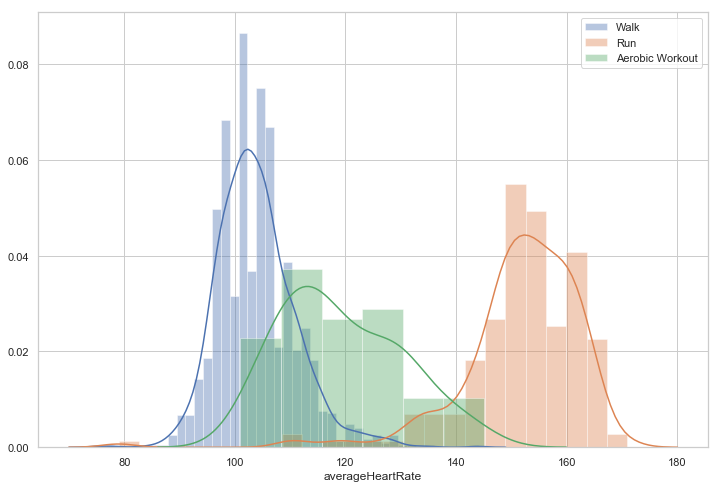

In [101]:
# get a list of dataframes only containing rows with respective activity from top activity 
hrtables=[]
hri=0
for x in top_activities:
    tablex = activity2[activity2['activityName']==x]
    hrtables.append(tablex)
# plot the distribution of heart rates for top 3 activities 
plt.figure(figsize=(12,8))
for x in hrtables:
    sns.distplot(x['averageHeartRate'], label=top_activities[hri])
    hri+=1
plt.legend();

#### Plotting distributions of calories burned and top 3 activities

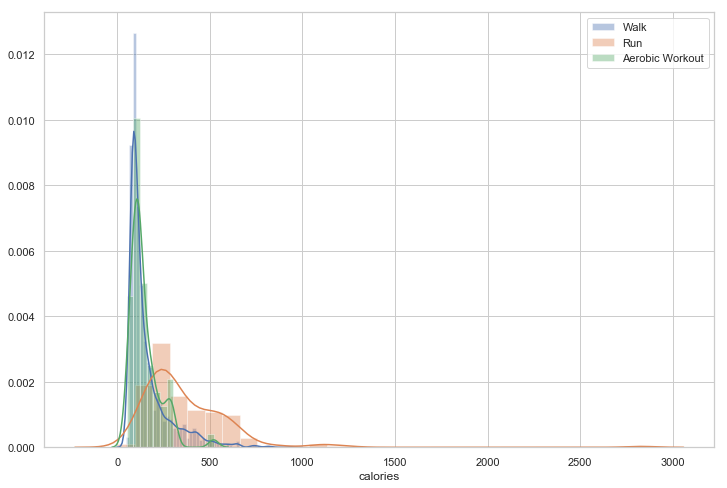

In [102]:
# we will do the same thing as above, but for calories and top 3 activities 
activity3 = activity[activity['calories'].isna()==False]
caltables=[]
cali=0
for x in top_activities:
    tablex = activity3[activity3['activityName']==x]
    caltables.append(tablex)
# plot the distribution of heart rates for top 3 activities 
plt.figure(figsize=(12,8))
for x in caltables:
    sns.distplot(x['calories'], label=top_activities[cali])
    cali+=1
plt.legend();

### Active Minutes

In [103]:
very = cleaned[5]
very.head()

,dateTime,very active min,Day of Week,Is Weekend,Month,Day,Year
very active min,,,,,,,
0,06/28/17 00:00:00,94,2,False,6,28,2017
1,06/29/17 00:00:00,37,3,False,6,29,2017
2,06/30/17 00:00:00,15,4,False,6,30,2017
3,07/01/17 00:00:00,98,5,False,7,1,2017
4,07/02/17 00:00:00,26,6,True,7,2,2017


In [104]:
light_active = cleaned[8]
light_active.head()

,dateTime,lightly active min,Day of Week,Is Weekend,Month,Day,Year
lightly active min,,,,,,,
0,12/20/18 00:00:00,226,3,False,12,20,2018
1,12/21/18 00:00:00,240,4,False,12,21,2018
2,12/22/18 00:00:00,317,5,False,12,22,2018
3,12/23/18 00:00:00,277,6,True,12,23,2018
4,12/24/18 00:00:00,377,0,True,12,24,2018


In [105]:
sed_min = cleaned[1]
sed_min.head()

,dateTime,sedentary min,Day of Week,Is Weekend,Month,Day,Year
sedentary min,,,,,,,
0,04/24/18 00:00:00,603,1,False,4,24,2018
1,04/25/18 00:00:00,568,2,False,4,25,2018
2,04/26/18 00:00:00,1049,3,False,4,26,2018
3,04/27/18 00:00:00,566,4,False,4,27,2018
4,04/28/18 00:00:00,590,5,False,4,28,2018


In [106]:
mod_active = cleaned[4]
mod_active.head()

,dateTime,moderately active min,Day of Week,Is Weekend,Month,Day,Year
moderately active min,,,,,,,
0,02/18/19 00:00:00,28,0,True,2,18,2019
1,02/19/19 00:00:00,53,1,False,2,19,2019
2,02/20/19 00:00:00,52,2,False,2,20,2019
3,02/21/19 00:00:00,36,3,False,2,21,2019
4,02/22/19 00:00:00,37,4,False,2,22,2019


#### Active Minute Insights

In [107]:
#A function to plot different information on active minutes
def active_minutes_info(table):
    table.iloc[:, 1] = pd.to_numeric(table.iloc[:, 1])

    grouped = table.groupby("Day of Week").mean().reset_index()
    if table.columns[1].split(" ")[-2] == "active": 
        word = table.columns[1].split(" ")[0] + " " + table.columns[1].split(" ")[1]
    else: 
        word = table.columns[1].split(" ")[0]
    most = grouped[grouped.iloc[:, 1] == max(grouped.iloc[:, 1])].reset_index()["Day of Week"].iloc[0]
    least = grouped[grouped.iloc[:, 1] == min(grouped.iloc[:, 1])].reset_index()["Day of Week"].iloc[0]
    weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    print("On average, you are the most " + "'" + word + "'" + " on " + weekdays[most] + "s, and the least " + "'" + word + "'" + " on " + weekdays[least] + "s!")

    weekend = table[table["Is Weekend"] == True].mean()[0]
    weekday = table[table["Is Weekend"] == False].mean()[0]
    print("On average, you do " + str(round(weekday)) + " " + "'" + word + "'" + " minutes on weekdays, and " + str(round(weekend)) + " " + "'" + word + "'" + " minutes on weekends. That's a " + str(round(abs(weekday - weekend))) + " minute difference on average!")

    days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    plt.title("Average " + "'" + word + "'" + " For Each Day of Week")
    ax = sns.barplot(x = "Day of Week", y = grouped.columns[1], data=grouped)
    plt.figure(figsize = (10, 6))
    ax.set_xticklabels(days, rotation='45', fontsize=10)

#### Very Active Minutes

On average, you are the most 'very active' on Mondays, and the least 'very active' on Wednesdays!
On average, you do 49.0 'very active' minutes on weekdays, and 44.0 'very active' minutes on weekends. That's a 5.0 minute difference on average!


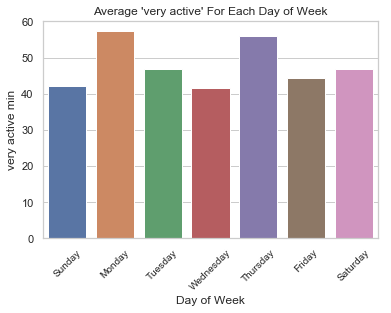

<Figure size 720x432 with 0 Axes>

In [108]:
#Information on "very active" minutes
active_minutes_info(very)

#### Moderately Active Minutes

On average, you are the most 'moderately active' on Thursdays, and the least 'moderately active' on Wednesdays!
On average, you do 51.0 'moderately active' minutes on weekdays, and 47.0 'moderately active' minutes on weekends. That's a 4.0 minute difference on average!


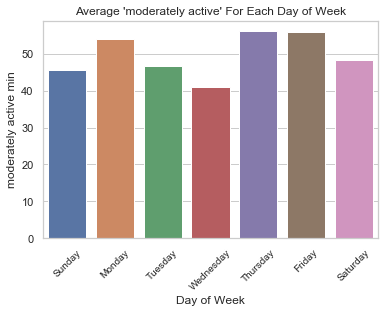

<Figure size 720x432 with 0 Axes>

In [109]:
#Information on "moderately active" minutes
active_minutes_info(mod_active)

#### Lightly Active Minutes

On average, you are the most 'lightly active' on Fridays, and the least 'lightly active' on Tuesdays!
On average, you do 240.0 'lightly active' minutes on weekdays, and 222.0 'lightly active' minutes on weekends. That's a 18.0 minute difference on average!


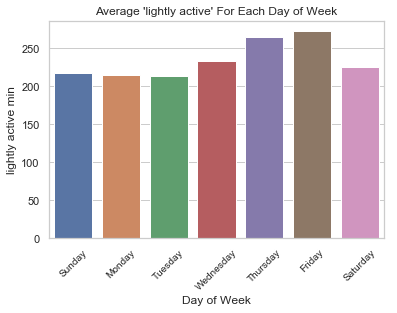

<Figure size 720x432 with 0 Axes>

In [110]:
#Information on "lightly active" minutes
active_minutes_info(light_active)

#### Sedentary Minutes 

On average, you are the most 'sedentary' on Wednesdays, and the least 'sedentary' on Fridays!
On average, you do 623.0 'sedentary' minutes on weekdays, and 639.0 'sedentary' minutes on weekends. That's a 16.0 minute difference on average!


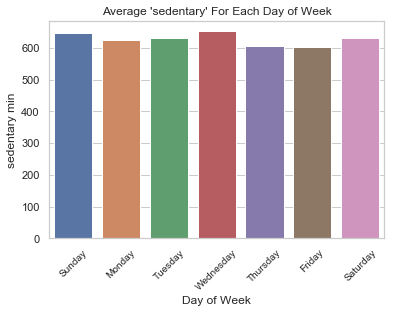

<Figure size 720x432 with 0 Axes>

In [111]:
#Information on "sedentary" minutes
active_minutes_info(sed_min)

#### Active minutes of each day

In [112]:
#A function to showcase distribution of active minutes each day
def all_active_minutes():
    days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    new = pd.merge(mod_active, sed_min)
    new1 = pd.merge(new, light_active)
    new2 = pd.merge(new1, very)
    grouped = new2.groupby("Day of Week").mean().reset_index()
    df2 = pd.DataFrame(grouped, columns=['moderately active min', 'very active min', 'lightly active min'])
    ax = df2.plot.bar();
    plt.figure(figsize = (20, 10))
    ax.set_xticklabels(days, rotation='45', fontsize=10)

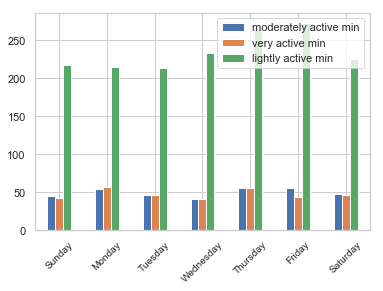

<Figure size 1440x720 with 0 Axes>

In [113]:
all_active_minutes()

### Distance Traveled

In [114]:
dist = cleaned[3]
dist.head()

,date,distance traveled,Day of Week,Is Weekend,Month,Day,Year
0,0016-12-31,595818,5,False,12,31,2016
1,0017-01-01,1158255,6,True,1,1,2017
2,0017-01-02,440072,0,True,1,2,2017
3,0017-01-03,875255,1,False,1,3,2017
4,0017-01-04,876012,2,False,1,4,2017


#### Comparing distance traveled

In [115]:
def distance(df):
    plt.figure()
    sns.boxplot(x="Day of Week", y='distance traveled', data=df)
    plt.title("Day of Week vs Distance Traveled");
    print('Hmm, distances travleled on Tuesdays seem to be very concentrated.')
    plt.figure()
    sns.boxplot(x="Is Weekend", y='distance traveled', data=df)
    plt.title("Is Weekend vs Distance Traveled");
    print('You sure have more activity on the weekdays!')
    plt.figure()
    sns.boxplot(x="Month", y='distance traveled', data=df)
    plt.title("Month vs Distance Traveled");
    plt.figure()
    sns.boxplot(x="Day", y='distance traveled', data=df)
    plt.title("Day vs Distance Traveled");
    print('Maybe try doing more activities in the middle of the month.')

Hmm, distances travleled on Tuesdays seem to be very concentrated.
You sure have more activity on the weekdays!
Maybe try doing more activities in the middle of the month.


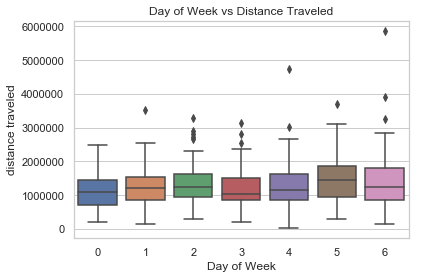

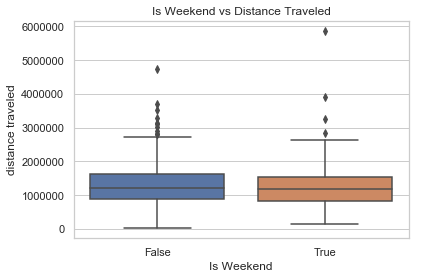

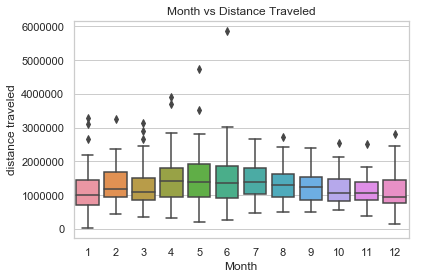

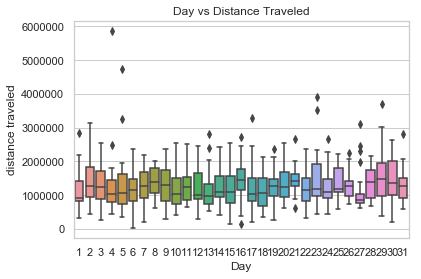

In [116]:
distance(dist)

## Heartrate

In [118]:
rest_heart = cleaned[0]
rest_heart.head()

,dateTime,Day of Week,Is Weekend,Month,Day,Year,heartrate,error
resting heartrate,,,,,,,,
151,05/30/17 00:00:00,1,False,5,30,2017,72.000000,100.000000
152,05/31/17 00:00:00,2,False,5,31,2017,66.424713,26.950447
153,06/01/17 00:00:00,3,False,6,1,2017,65.973721,10.661155
154,06/02/17 00:00:00,4,False,6,2,2017,65.922898,7.914382
155,06/03/17 00:00:00,5,False,6,3,2017,66.353669,7.146274


#### Resting heartrate vs. Day of the Week

In [119]:
def heart_day(df):
    plt.figure(figsize = (10, 8))
    sns.boxplot(x = 'Day of Week', y = 'heartrate', data = df)
    x = np.array([0, 1, 2, 3, 4, 5, 6])
    new = np.array(['Sun', 'Mon', 'Tue', 'Wed','Thur','Fri', 'Sat'])
    plt.xticks(x, new)
    plt.title('Heartrate vs. Day of Week')
    plt.ylabel('Heartrate')

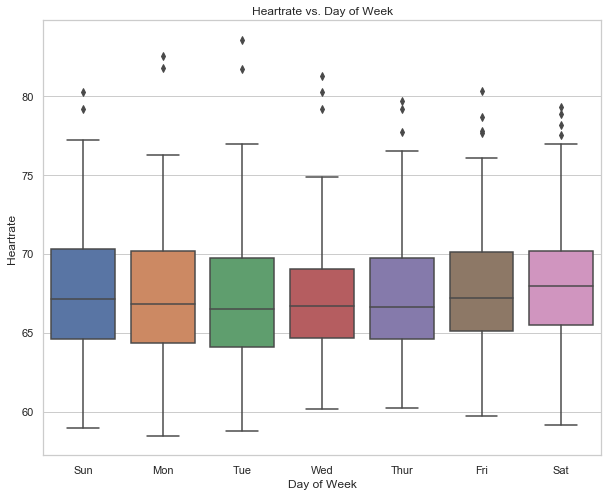

In [120]:
heart_day(rest_heart)

#### Comparing resting heartrate with weekends vs. weekdays

In [121]:
def heart_weekend(df):
    plt.figure(figsize=(7, 5))
    sns.boxplot(x = 'Is Weekend', y = 'heartrate', data = df)
    plt.title('Is Weekend vs. Resting heartrate')
    plt.ylabel('Heartrate')
    print('Your heartrate on the weekdays seem to be more varied!')

Your heartrate on the weekdays seem to be more varied!


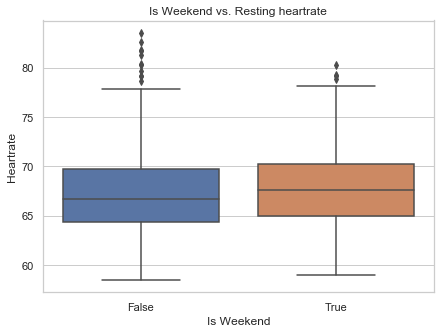

In [122]:
heart_weekend(rest_heart)

#### Resting heartrate over time

This function shows one's resting heartrate trend over a period of time, when he or she is not doing any vigorous activities.

In [123]:
def heart_over_time(df):
    plt.figure(figsize=(20, 6))
    ax = sns.scatterplot(x = 'dateTime', y = 'heartrate', data = df)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title('Resting Heart Rate')
    plt.ylabel('Heartrate')
    plt.xlabel('Date')
    plt.show()
    print('Your vitals are looking great!')

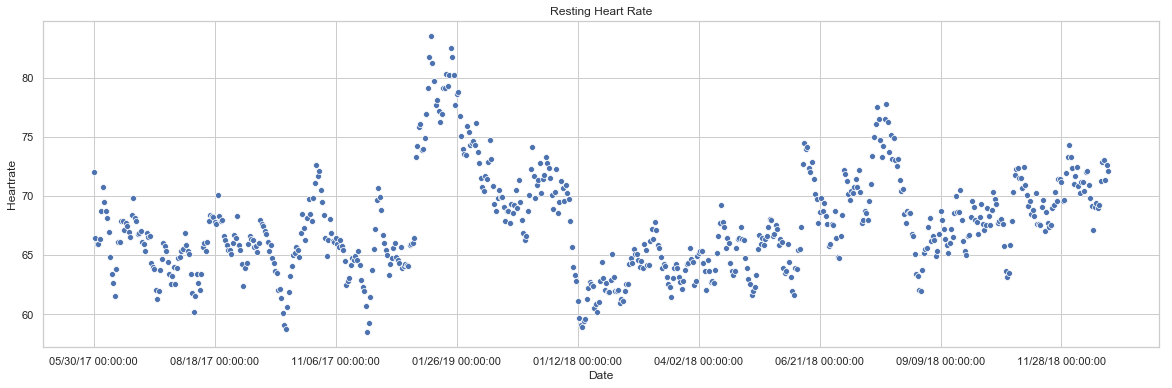

Your vitals are looking great!


In [124]:
heart_over_time(rest_heart)

## Calories

In [125]:
cal_burned = cleaned[9]
cal_burned

,dateTime,calories burned,Day of Week,Is Weekend,Month,Day,Year,Hour,Minute,Second
calories burned,,,,,,,,,,
0,02/28/17 00:00:00,0.92,1,False,2,28,2017,0,0,0
1,02/28/17 00:01:00,0.92,1,False,2,28,2017,0,1,0
2,02/28/17 00:02:00,2.20,1,False,2,28,2017,0,2,0
3,02/28/17 00:03:00,0.92,1,False,2,28,2017,0,3,0
4,02/28/17 00:04:00,0.92,1,False,2,28,2017,0,4,0
5,02/28/17 00:05:00,0.92,1,False,2,28,2017,0,5,0
6,02/28/17 00:06:00,0.92,1,False,2,28,2017,0,6,0
7,02/28/17 00:07:00,0.92,1,False,2,28,2017,0,7,0
8,02/28/17 00:08:00,0.92,1,False,2,28,2017,0,8,0


In [126]:
def agg_cal_burned(df):
    df = df.groupby(['Month', 'Day', 'Year']).agg({'calories burned':np.sum, 'Day of Week': np.mean, 'Is Weekend': np.mean})
    return df

In [127]:
agg = agg_cal_burned(cal_burned)

In [128]:
#input dataframe has to have been processed using the 'agg_cal_burned' function.
def table3_stats(df3):
    mini = df3[df3['calories burned'] == df3['calories burned'].min()].reset_index()
    maxi = df3[df3['calories burned'] == df3['calories burned'].max()].reset_index()
    bottom_25 = df3['calories burned'].describe()['25%']
    top_25 = df3['calories burned'].describe()['75%']
    
    #Most active day of week
    days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    tbl1 = df3.groupby('Day of Week').mean()
    tbl1['Day'] = days
    tbl1 = tbl1.set_index('Day')
    tbl1 = tbl1[tbl1['calories burned'] == tbl1['calories burned'].max()].loc[:, ['calories burned']]
    
    #Most active month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October' \
              , 'November', 'December']
    tbl2 = df3.groupby('Month').mean().reset_index()
    tbl2['Month'] = months
    tbl2 = tbl2.set_index('Month')
    tbl2 = tbl2[tbl2['calories burned'] == tbl2['calories burned'].max()].loc[:, ['calories burned']]
    
    #Whether weekday or weekend is most active
    tbl3 = df3.groupby('Is Weekend').mean()
    tbl3 = tbl3[tbl3['calories burned'] == tbl3['calories burned'].max()].loc[:, ['calories burned']]
    
    print('Based on the information provided and the dates you wore your Fitbit:')
    print()
    print('On ' + str(mini['Month'][0]) + '/' + str(mini['Day'][0]) + '/' + str(mini['Year'][0]) \
          + ' you burnt a minimum of ' + str(np.round_(mini['calories burned'][0], decimals=2)) + ' calories.')
    print()
    print('On ' + str(maxi['Month'][0]) + '/' + str(maxi['Day'][0]) + '/' + str(maxi['Year'][0]) \
          + ' you burnt a maximum of ' + str(np.round_(maxi['calories burned'][0], decimals=2)) + ' calories.')
    print()
    print('For 50% of the days on which you used your fitbit, you burned between ' \
          + str(np.round(bottom_25, decimals=2)) + ' and ' + str(np.round(top_25, decimals=2)) + ' calories.')
    print()
    print('During the week, you burn the most calories on ' + tbl1.index.values[0] + ', buring an average of ' \
          + str(np.round(tbl1.iloc[0, 0], decimals=2)) + ' calories.')
    print()
    print('During the month of ' + str(tbl2.index.values[0]) + ' you had the highest average burned calories per day' \
          + ' burning an average of ' + str(np.round(tbl2.iloc[0,0], decimals=2)) + ' calories.')

In [129]:
table3_stats(agg)

Based on the information provided and the dates you wore your Fitbit:

On 4/2/2019 you burnt a minimum of 1077.49 calories.

On 5/5/2017 you burnt a maximum of 4375.24 calories.

For 50% of the days on which you used your fitbit, you burned between 2093.39 and 2595.31 calories.

During the week, you burn the most calories on Thursday, buring an average of 2513.65 calories.

During the month of June you had the highest average burned calories per day burning an average of 2504.98 calories.


#### Hours vs. Calories Burned

In [130]:
#input dataframe has only been processed using the 'index' function.
def table3_graph1(df3):
        
    #plots a scatter and regression plot
    df3['calories burned'] = df3['calories burned'].apply(np.double)
    tbl1 = df3.groupby(['Month', 'Day', 'Year', 'Hour']).agg({'calories burned': np.sum, 'Day of Week': np.mean, \
                                                     'Is Weekend': np.mean})
    tbl2 = tbl1.groupby('Hour').agg({'calories burned': 'mean'}).reset_index()
    ax = sns.lmplot(x = 'Hour', y = 'calories burned', data = tbl2, order=3, size=5, aspect=2)
    ax.set(xlabel='Hour', ylabel='Calories Burned', title ='Hour vs Calories Burned')

/Users/kelleyliu/anaconda3/envs/data-x/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


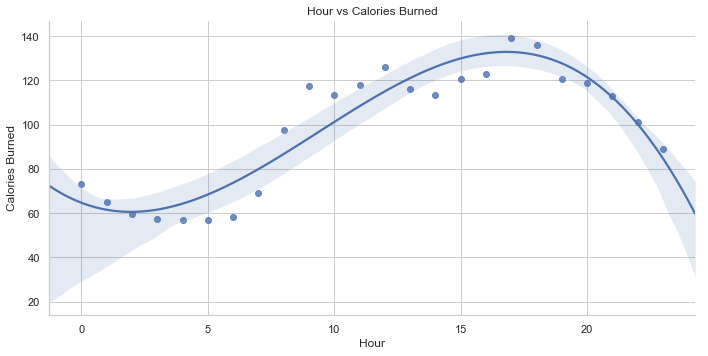

In [131]:
table3_graph1(cal_burned)

#### Day of Week vs. Calories Burned

In [132]:
def table3_graph2(df3):
    tbl1 = df3.groupby(['Month', 'Day', 'Year', 'Hour']).agg({'calories burned': np.sum, 'Day of Week': np.mean, \
                                                     'Is Weekend': np.mean})
    #plots a bar graph 
    tbl2 = tbl1.groupby('Day of Week').agg({'calories burned': 'mean'}).reset_index()
    tbl2['Day of Week'] = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
    sns.set(style="whitegrid")
    ax2 = sns.barplot(x = 'Day of Week', y = 'calories burned', data=tbl2, linewidth=2.5, palette="Blues_d")
    ax2.set_ylabel('Calories Burned')
    ax2.set_title('Day of Week vs Calories Burned')

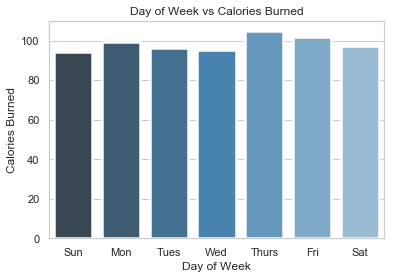

In [133]:
table3_graph2(cal_burned)

## Sleep

In [134]:
sleep = cleaned[2]
sleep.head()

,dateOfSleep,duration,efficiency,endTime,infoCode,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,startTime,...,deepthirtyDayAvgMinutes,wakecount,wakeminutes,wakethirtyDayAvgMinutes,lightcount,lightminutes,lightthirtyDayAvgMinutes,remcount,remminutes,remthirtyDayAvgMinutes
sleep data,,,,,,,,,,,,,,,,,,,,,
0,2017-12-25,29820000,97,2017-12-25T06:26:00.000,0,0,442,55,0,2017-12-24T22:08:30.000,...,66,22,55,65,22,281,254,7,85,93
1,2017-12-24,3900000,88,2017-12-24T18:42:30.000,2,0,57,8,0,2017-12-24T17:37:00.000,...,0,0,0,0,0,0,0,0,0,0
2,2017-12-24,24480000,95,2017-12-24T06:55:30.000,0,0,357,51,0,2017-12-24T00:07:00.000,...,66,22,51,65,22,224,256,9,91,93
3,2017-12-23,7980000,96,2017-12-23T16:28:00.000,2,0,128,5,0,2017-12-23T14:15:00.000,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-22,32400000,94,2017-12-22T20:25:30.000,0,0,448,92,0,2017-12-22T11:25:30.000,...,66,23,92,64,27,299,254,6,61,94


In [135]:
def sleep_analysis(): 
    very["very active min"] = very["very active min"].apply(np.double)
    very["greater than avg"] = very["very active min"] > very["very active min"].mean()
    very["new date"] = [datetime.datetime.strptime(date, "%m/%d/%y 00:00:00") for date in very["dateTime"]]
    sleep["new date"] = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in sleep["dateOfSleep"]]
    new = pd.merge(very[["new date", "very active min", "greater than avg"]], sleep, on = "new date")
    
    exercised = round(new[new["greater than avg"] == True]["lightminutes"].mean())
    nonexercised = round(new[new["greater than avg"] == False]["lightminutes"].mean())
    difference = nonexercised - exercised
    print("On days where you exercise, you get " + str(exercised) + " 'light minutes' on average, while on days where you don't exercise, you get " + str(nonexercised) + ". Because you get " + str(difference) + " less minutes of light sleep on days where you exercise, which means you get better quality sleep on exercise days!")
    print()
    new = new.groupby("greater than avg").mean().reset_index()
    df2 = new[["greater than avg", "wakeminutes", "lightminutes", "remminutes"]]
    labels = ["No Exercise", "Exercise"]
    ax = df2.plot.bar()
    ax.set_xticklabels(labels, rotation='45', fontsize=10)
    ax.set_ylabel("Amount of Sleep")
    plt.title("How Exercise Affects Sleep")
    
    exercised = round(new[new["greater than avg"] == True]["minutesAsleep"].mean())
    nonexercised = round(new[new["greater than avg"] == False]["minutesAsleep"].mean())
    difference = exercised - nonexercised
    print("On days where you exercise, you sleep " + str(exercised) + " minutes on avg, while on days where you don't exercise, you sleep " + str(nonexercised) + ". You sleep for " + str(difference) + " more minutes on days where you exercise!")
    print()
    df3 = new[["greater than avg", "timeInBed", "minutesAsleep"]]
    bx = df3.plot.bar()
    bx.set_xticklabels(labels, rotation='45', fontsize=10)
    bx.set_ylabel("Amount of Sleep")
    plt.title("How Exercise Affects Sleep")

On days where you exercise, you get 146 'light minutes' on average, while on days where you don't exercise, you get 173. Because you get 27 less minutes of light sleep on days where you exercise, which means you get better quality sleep on exercise days!

On days where you exercise, you sleep 362 minutes on avg, while on days where you don't exercise, you sleep 336. You sleep for 26 more minutes on days where you exercise!



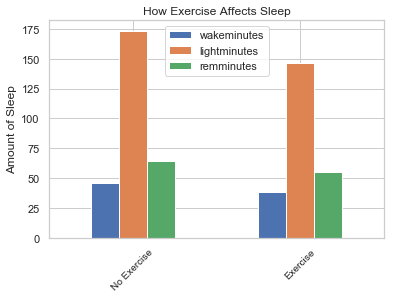

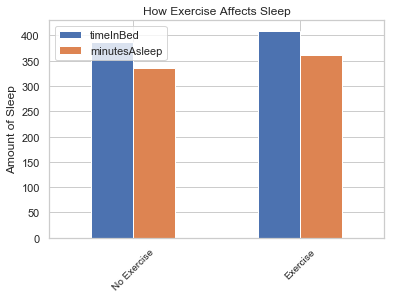

In [136]:
sleep_analysis()

In [137]:
new = pd.merge(very[["new date", "very active min", "greater than avg"]], sleep, on = "new date")
new.head()

,new date,very active min,greater than avg,dateOfSleep,duration,efficiency,endTime,infoCode,minutesAfterWakeup,minutesAsleep,...,deepthirtyDayAvgMinutes,wakecount,wakeminutes,wakethirtyDayAvgMinutes,lightcount,lightminutes,lightthirtyDayAvgMinutes,remcount,remminutes,remthirtyDayAvgMinutes
0,2017-06-28,94.0,True,2017-06-28,20340000,94,2017-06-28T08:15:00.000,0,0,279,...,0,25,60,0,24,182,0,8,61,0
1,2017-06-28,94.0,True,2017-06-28,7800000,100,2017-06-28T02:25:00.000,2,0,130,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-28,94.0,True,2017-06-28,20340000,94,2017-06-28T08:15:00.000,0,0,279,...,75,25,60,71,24,182,254,8,61,95
3,2017-06-28,94.0,True,2017-06-28,7800000,100,2017-06-28T02:25:00.000,2,0,130,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-29,37.0,False,2017-06-29,29520000,89,2017-06-29T07:21:30.000,0,1,406,...,36,21,86,60,20,223,182,10,113,61


In [138]:
#Difference in quality of sleep between exercise days and non-exercise days.
new = new.groupby("greater than avg").mean().reset_index()
new

,greater than avg,very active min,duration,efficiency,infoCode,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,timeInBed,...,deepthirtyDayAvgMinutes,wakecount,wakeminutes,wakethirtyDayAvgMinutes,lightcount,lightminutes,lightthirtyDayAvgMinutes,remcount,remminutes,remthirtyDayAvgMinutes
0,False,22.411475,2.320190e+07,93.408197,0.432787,0.395082,335.873770,49.359016,0.655738,386.698361,...,43.740984,19.740984,45.568852,43.526230,18.460656,173.465574,167.347541,6.690164,64.116393,61.537705
1,True,84.270455,2.456182e+07,93.709091,0.277273,0.493182,361.654545,46.688636,0.368182,409.363636,...,36.825000,16.361364,37.938636,36.720455,15.286364,146.375000,141.577273,5.536364,55.061364,52.661364


#### Distribution of Sleep

This function shows the distribution of each kind of sleep -- light, deep, and REM.

In [139]:
def hist_sleep(df):
    plt.figure(figsize=(10,6))
    sns.distplot(df['lightminutes'], label = 'Light', kde_kws={'clip': (0.0, 500)})
    sns.distplot(df['deepminutes'], label = 'Deep', kde_kws={'clip': (0.0, 500)})
    sns.distplot(df['remminutes'], label = 'REM', kde_kws={'clip': (0.0, 500)})
    plt.xlabel('Minutes of Sleep')
    plt.ylabel('Proportion')
    plt.title('Distribution of Sleep')
    plt.legend()
    plt.show()
    print('You get the most "light" sleep each night! Averaging 250 minutes per night.')
    print('You get the least "deep" sleep each night! Averaging 70 minutes per night.')
    print('On average you get about 100 minutes of "REM" sleep each night!')
    
    

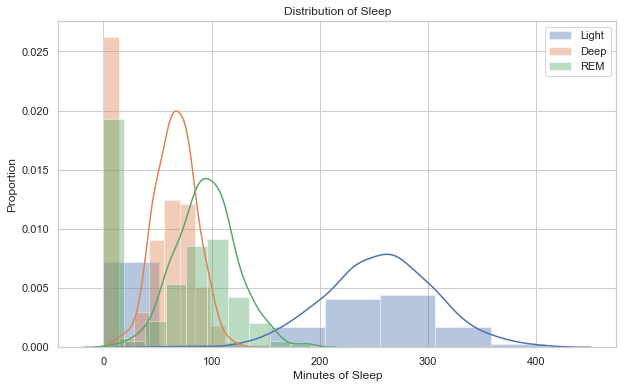

You get the most "light" sleep each night! Averaging 250 minutes per night.
You get the least "deep" sleep each night! Averaging 70 minutes per night.
On average you get about 100 minutes of "REM" sleep each night!


In [140]:
hist_sleep(sleep)

In [141]:
def sleep_min(df):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x = 'lightminutes', y = 'timeInBed', data = df, label = 'Light Minutes')
    sns.scatterplot(x = 'remminutes', y = 'timeInBed', data = df, label = 'Rem Minutes')
    sns.scatterplot(x = 'minutesAsleep', y = 'timeInBed', data = df, label = 'Minutes Asleep')
    sns.scatterplot(x = 'deepminutes', y = 'timeInBed', data = df, label = 'Deep Minutes')
    plt.title('Type of Sleep (minutes) vs. Time in Bed')
    plt.xlabel('Minutes')
    plt.ylabel('Time in Bed (minutes)')
    print()

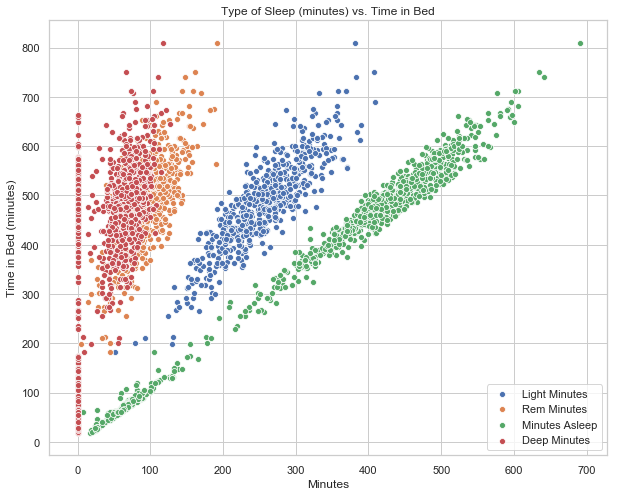

In [142]:
sleep_min(sleep)

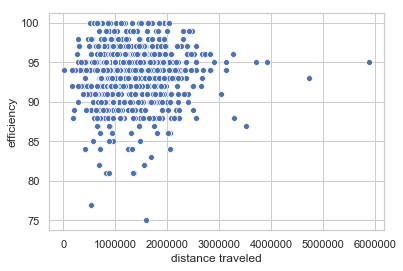

In [143]:
# create a datetime object in sleep in order to merge with distance traveled 
def create_datetime_sleep(df_sleep):
    df_sleep['datetime'] = [datetime.date(int(x[0:4]), int(x[5:7]), int(x[8:10])) for x in df_sleep['dateOfSleep']]
create_datetime_sleep(sleep)

#merge sleep and distance traveled graphs
def create_inner_merge(df1, df2):
    return pd.concat([df1, df2], axis=1, join='inner')
merged_distance_sleep = create_inner_merge(sleep, dist)
def create_sleepdistance_scatterplot(inputdata):
    sns.scatterplot(y='efficiency', x='distance traveled', data=inputdata)
create_sleepdistance_scatterplot(merged_distance_sleep)
